In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os.path
import json
import time

In [21]:
# https://county.milwaukee.gov/EN/County-Clerk/Off-Nav/Election-Results/Election-Results-Fall-2020
DATA_ROOT_PATH = '/src/data/wi-voting'
FILENAME = 'Milwaukee-county-2020.csv'

In [22]:
df = pd.read_csv (os.path.join(DATA_ROOT_PATH, FILENAME))

In [24]:
df.head(10)

,index,Ward,Joseph R. Biden / Kamala D. Harris,Donald J. Trump / Michael R. Pence,Don Blankenship / William Mohr,Jo Jorgensen / Jeremy Spike Cohen,Brian Carroll / Amar Patel,WRITE-IN
0,1,City of Milwaukee Ward 1,974,190,5,5,2,6
1,2,City of Milwaukee Ward 2,323,28,0,3,1,1
2,3,City of Milwaukee Ward 3,718,146,1,3,1,4
3,4,City of Milwaukee Ward 4,1257,188,4,8,4,7
4,5,City of Milwaukee Ward 5,660,102,1,5,2,3
5,6,City of Milwaukee Ward 6,1408,350,0,9,3,1
6,7,City of Milwaukee Ward 7,398,158,1,3,1,1
7,8,City of Milwaukee Ward 8,1150,306,4,16,3,2
8,9,City of Milwaukee Ward 9,633,115,0,2,1,0
9,10,City of Milwaukee Ward 10,880,284,2,4,0,4


In [25]:
df.dtypes

index                                  int64
Ward                                  object
Joseph R. Biden / Kamala D. Harris     int64
Donald J. Trump / Michael R. Pence     int64
Don Blankenship / William Mohr         int64
Jo Jorgensen / Jeremy Spike Cohen      int64
Brian Carroll / Amar Patel             int64
WRITE-IN                               int64
dtype: object

In [26]:
def get_first_digit(num):
    num_str=str(num)
    return int(num_str[0])

In [27]:
assert get_first_digit(459)==4
assert get_first_digit(23451)==2
assert get_first_digit(953)==9

In [30]:
s_name = ('JOE_1ST', 'DONALD_1ST', 'DON_1ST', 'JO_1ST', 'BRIAN_1ST', )
col_name = ('Joseph R. Biden / Kamala D. Harris', 'Donald J. Trump / Michael R. Pence', 'Don Blankenship / William Mohr', 'Jo Jorgensen / Jeremy Spike Cohen', 'Brian Carroll / Amar Patel',)

for k, v in dict(zip(s_name, col_name)).items():
    df[k] = df[v].apply(get_first_digit)


In [31]:
df.head(10)

,index,Ward,Joseph R. Biden / Kamala D. Harris,Donald J. Trump / Michael R. Pence,Don Blankenship / William Mohr,Jo Jorgensen / Jeremy Spike Cohen,Brian Carroll / Amar Patel,WRITE-IN,JOE_1ST,DONALD_1ST,DON_1ST,JO_1ST,BRIAN_1ST
0,1,City of Milwaukee Ward 1,974,190,5,5,2,6,9,1,5,5,2
1,2,City of Milwaukee Ward 2,323,28,0,3,1,1,3,2,0,3,1
2,3,City of Milwaukee Ward 3,718,146,1,3,1,4,7,1,1,3,1
3,4,City of Milwaukee Ward 4,1257,188,4,8,4,7,1,1,4,8,4
4,5,City of Milwaukee Ward 5,660,102,1,5,2,3,6,1,1,5,2
5,6,City of Milwaukee Ward 6,1408,350,0,9,3,1,1,3,0,9,3
6,7,City of Milwaukee Ward 7,398,158,1,3,1,1,3,1,1,3,1
7,8,City of Milwaukee Ward 8,1150,306,4,16,3,2,1,3,4,1,3
8,9,City of Milwaukee Ward 9,633,115,0,2,1,0,6,1,0,2,1
9,10,City of Milwaukee Ward 10,880,284,2,4,0,4,8,2,2,4,0


In [43]:
print('# of polling places: %s' %len(df.index))

# of polling places: 478


In [48]:
benford_probs = [math.log10((d+1)/d) for d in range(1,10)]

In [41]:
s_dict = dict()

for name, col in dict(zip(s_name, col_name)).items():
    serie=df[name].value_counts().sort_index().drop(index=0)
    dist_serie = serie.apply(lambda count: count/float(serie.sum()))
    s_dict[col] = dist_serie
    print(col)
    print(dist_serie)

Joseph R. Biden / Kamala D. Harris
1    0.181435
2    0.073840
3    0.107595
4    0.145570
5    0.166667
6    0.130802
7    0.088608
8    0.059072
9    0.046414
Name: JOE_1ST, dtype: float64
Donald J. Trump / Michael R. Pence
1    0.240000
2    0.178947
3    0.187368
4    0.120000
5    0.073684
6    0.075789
7    0.056842
8    0.033684
9    0.033684
Name: DONALD_1ST, dtype: float64
Don Blankenship / William Mohr
1    0.482759
2    0.266458
3    0.150470
4    0.053292
5    0.025078
6    0.012539
7    0.003135
8    0.006270
Name: DON_1ST, dtype: float64
Jo Jorgensen / Jeremy Spike Cohen
1    0.372247
2    0.169604
3    0.123348
4    0.085903
5    0.068282
6    0.041850
7    0.052863
8    0.046256
9    0.039648
Name: JO_1ST, dtype: float64
Brian Carroll / Amar Patel
1    0.373178
2    0.317784
3    0.183673
4    0.061224
5    0.037901
6    0.017493
7    0.008746
Name: BRIAN_1ST, dtype: float64


In [72]:
def plot_graph(fig, axs, name, i, j):
    axs[i, j].bar(s_dict[name].index, s_dict[name].values)
    axs[i, j].set_xticks(s_dict[name].index)
    #axs[i, j].xlabel("First leading number")
    axs[i, j].set_title(name)
    axs[i, j].plot(range(1,10), benford_probs, '.-',color='red')

<IPython.core.display.Javascript object>


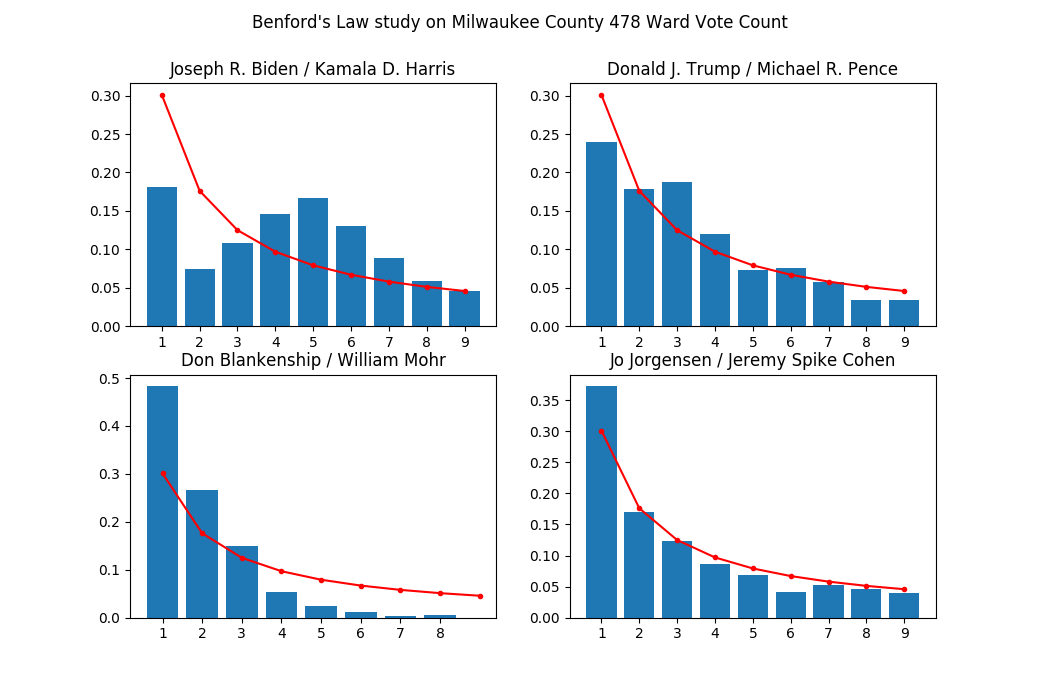

In [78]:
max_i = 2
max_j = 2
fig, axs = plt.subplots(max_i, max_j)
i = 0
j = 0
fig.suptitle('Benford\'s Law study on Milwaukee County 478 Ward Vote Count')
for i in range(max_i):
    for j in range(max_j):
        index = i * max_j + j
        if index >= len(col_name):
            break
        col = col_name[index]
        plot_graph(fig, axs, col, i, j)
    